In [1]:
import pandas as pd
import sklearn
from google.colab import drive
import seaborn as sns
sns.regplot(data=df_7, x='Predict', y='Actual')
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/output1.xlsx")
df = df.drop(columns='Unnamed: 0')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Author,User Rating,Reviews,Price,Year,Genre,Subgenre
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction,Novel
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction,Novel
2,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction,Non Fiction
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction,Comedy
4,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction,Children
...,...,...,...,...,...,...,...,...
545,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,Games
546,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2018,Fiction,Games
547,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction,Games
548,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction,Non Fiction


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Будем прогнозировать значения Price, User Rating и Reviews по полю Subgenre. Для этого нам нужно выполнить задачу регрессии. Используем методы Линейной регрессии и метод Случайного Леса (Random Forest).

Для начала спрогнозируем цену с помощью линейной регрессии:

In [3]:
df_1=df.copy()
l=list(set(df['Subgenre']))
print(l)
for i in range(0,550):
  l1 = l.index(df_1.at[i,'Subgenre'])
  df_1.at[i,'Subgenre'] = l1  #переводим поджанры в индексы
X_train, X_test, y_train, y_test = train_test_split(df_1[['Subgenre']].to_numpy(), df['Price'].to_numpy(), train_size= 0.8) #тренеровочная и тестовая выборка
reg = LinearRegression().fit(X_train, y_train)
print('rsquared=',reg.score(X_train, y_train)) # коэффициент детерминации
print('MSE=',mean_squared_error(y_test, reg.predict(X_test), squared=False)) # MSE

['Young Adult Fiction', 'Historical', 'Horror', 'Non Fiction', 'Games', 'Comedy', 'Thriller', 'Children', 'Science fiction', 'Fantasy', 'Drama', 'Novel', 'Comics']
rsquared= 0.01451730756567404
MSE= 12.890435198360214


Коэфициент детерминации получился довольно низким, но среднеквадратичная ошибка довольно маленькая, что показывает неплохую эффиктивность модели. Сравним пердсказанные данные с актуальными:

AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre    Predict  Actual
0          Novel   9.798055      11
1          Novel   9.798055      11
2    Non Fiction  13.206857       6
3         Comedy  12.354656       9
4       Children  11.502456      13
..           ...        ...     ...
545        Games  12.780757      27
546        Games  12.780757      27
547        Games  12.780757      27
548  Non Fiction  13.206857      17
549  Non Fiction  13.206857       6

[550 rows x 3 columns]


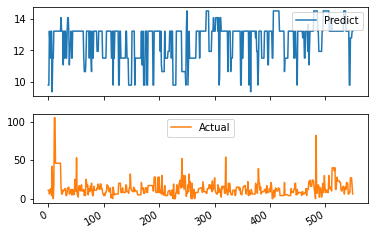

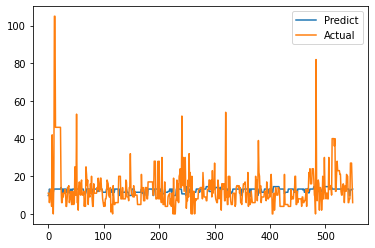

In [4]:
df_2=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(reg.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df.Price.to_numpy())})
df_2.to_excel("/content/drive/MyDrive/Colab Notebooks/linear_price.xlsx")
print(df_2.plot(subplots=True))
print(df_2.plot())
print(df_2)

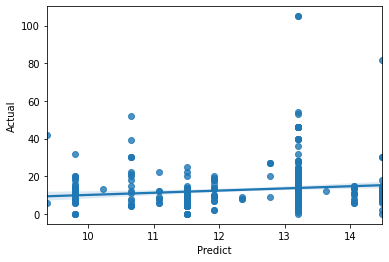

In [14]:
sns.regplot(data=df_2, x='Predict', y='Actual')

Видим что данная модель довольно хорошо апроксимирует значения цены для каждого поджанра. Некоторые реальные значения сильно отклоняются от  средних, поэтомуна поджанрах с этими знаечения регрессионная модель будет предсказывать не совсем верные значения. По графику видно, что таких серьезных отклонений около 10, так что для финальных данных эти артефакты не столь важны.

Теперь сраним работу линейной регрессии и регрессии на Случайном Лесе:

0.08804932043072244
12.700709751977515
AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre    Predict  Actual
0          Novel  10.154360      11
1          Novel  10.154360      11
2    Non Fiction  14.127936       6
3         Comedy   9.252444       9
4       Children   7.150324      13
..           ...        ...     ...
545        Games  16.947519      27
546        Games  16.947519      27
547        Games  16.947519      27
548  Non Fiction  14.127936      17
549  Non Fiction  14.127936       6

[550 rows x 3 columns]


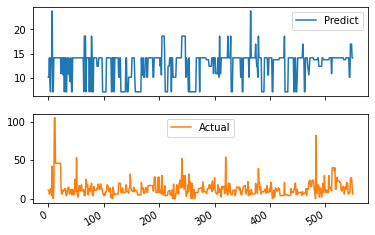

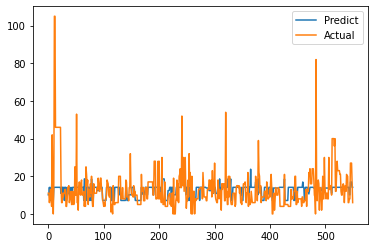

In [5]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor().fit(X_train, y_train)
print(randomforest.score(X_train, y_train))
print(mean_squared_error(y_test, randomforest.predict(X_test),squared=False))
df_3=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(randomforest.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df.Price.to_numpy())})
df_3.to_excel("/content/drive/MyDrive/Colab Notebooks/randomforest_price.xlsx")
print(df_3.plot(subplots=True))
print(df_3.plot())
print(df_3)

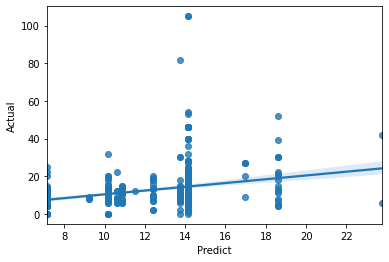

In [15]:
sns.regplot(data=df_3, x='Predict', y='Actual')

Метрики у случайного леса чуть лучше, чем у линейной регрессии, а предсказанные данные на графике и в таблице больше сходятся с настоящими, так что можно сделать вывод что регрессия основанная на модели Случайного Леса работает лучше

Теперь применим то же самое для User Rating и Reviews

rsquared= 0.0018512463425536252
MSE= 0.19765171372485135
AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre   Predict  Actual
0          Novel  4.589603     4.6
1          Novel  4.589603     4.6
2    Non Fiction  4.618076     4.4
3         Comedy  4.610957     4.8
4       Children  4.603839     4.8
..           ...       ...     ...
545        Games  4.614516     4.8
546        Games  4.614516     4.8
547        Games  4.614516     4.8
548  Non Fiction  4.618076     4.6
549  Non Fiction  4.618076     4.6

[550 rows x 3 columns]


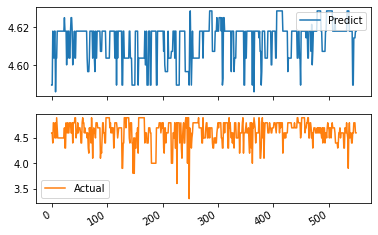

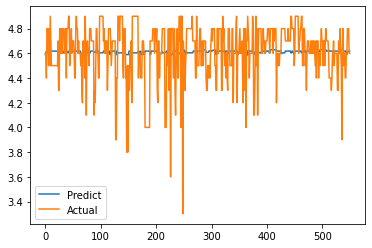

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_1[['Subgenre']].to_numpy(), df['User Rating'].to_numpy(), train_size= 0.8) #тренеровочная и тестовая выборка
reg1 = LinearRegression().fit(X_train1, y_train1)
print('rsquared=',reg1.score(X_train1, y_train1)) # коэффициент детерминации
print('MSE=',mean_squared_error(y_test1, reg1.predict(X_test1), squared=False)) # MSE
df_4=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(reg1.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df['User Rating'].to_numpy())})
df_4.to_excel("/content/drive/MyDrive/Colab Notebooks/linear_rating.xlsx")
print(df_4.plot(subplots=True))
print(df_4.plot())
print(df_4)

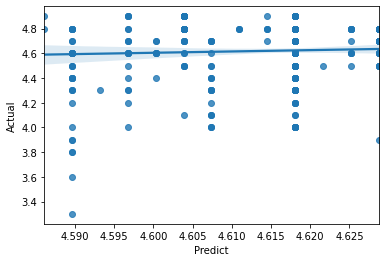

In [16]:
sns.regplot(data=df_4, x='Predict', y='Actual')

0.2668643678834882
0.17922758532286517
AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre   Predict  Actual
0          Novel  4.394852     4.6
1          Novel  4.394852     4.6
2    Non Fiction  4.585629     4.4
3         Comedy  4.797083     4.8
4       Children  4.808428     4.8
..           ...       ...     ...
545        Games  4.737564     4.8
546        Games  4.737564     4.8
547        Games  4.737564     4.8
548  Non Fiction  4.585629     4.6
549  Non Fiction  4.585629     4.6

[550 rows x 3 columns]


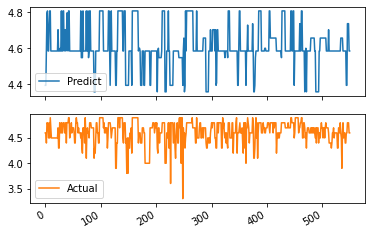

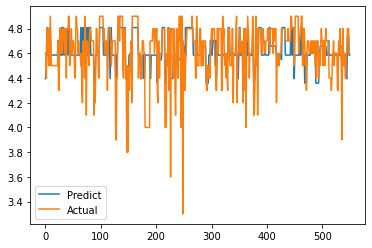

In [7]:
randomforest1 = RandomForestRegressor().fit(X_train1, y_train1)
print(randomforest1.score(X_train1, y_train1))
print(mean_squared_error(y_test1, randomforest1.predict(X_test1),squared=False))
df_5=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(randomforest1.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df['User Rating'].to_numpy())})
df_5.to_excel("/content/drive/MyDrive/Colab Notebooks/randomforest_rating.xlsx")
print(df_5.plot(subplots=True))
print(df_5.plot())
print(df_5)

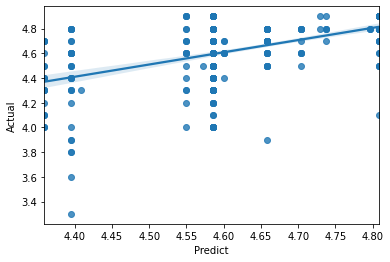

In [18]:
sns.regplot(data=df_5, x='Predict', y='Actual')

По значению среднеквадратичной ошибки можем определить, что модель работает хорошо(не смотря на очень маленькое значения коэфициента детерминации), это же подтверждают данные из  таблицы и графиков. Из двух моделей результаты лучше опять у Случайного Леса

Посмотрим, результаты предсказания для количества рецензий.

rsquared= 0.011318643136967288
MSE= 12843.796295504886
AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre       Predict  Actual
0          Novel  14876.723293    4866
1          Novel  14876.723293    4866
2    Non Fiction  11336.997037    3113
3         Comedy  12221.928601    9568
4       Children  13106.860165    8170
..           ...           ...     ...
545        Games  11779.462819   16990
546        Games  11779.462819   16990
547        Games  11779.462819   16990
548  Non Fiction  11336.997037     220
549  Non Fiction  11336.997037      37

[550 rows x 3 columns]


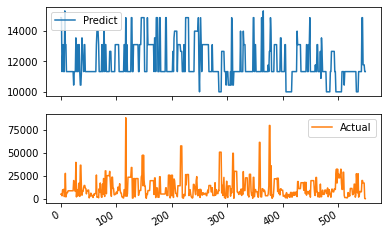

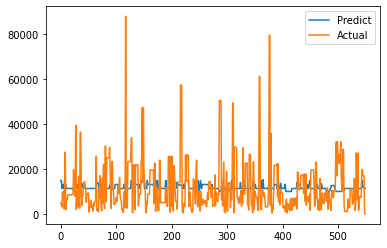

In [8]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_1[['Subgenre']].to_numpy(), df['Reviews'].to_numpy(), train_size= 0.8) #тренеровочная и тестовая выборка
reg2 = LinearRegression().fit(X_train2, y_train2)
print('rsquared=',reg2.score(X_train2, y_train2)) # коэффициент детерминации
print('MSE=',mean_squared_error(y_test2, reg2.predict(X_test2), squared=False)) # MSE
df_6=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(reg2.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df['Reviews'].to_numpy())})
df_6.to_excel("/content/drive/MyDrive/Colab Notebooks/linear_reviews.xlsx")
print(df_6.plot(subplots=True))
print(df_6.plot())
print(df_6)

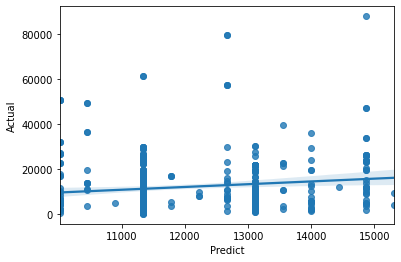

In [19]:
sns.regplot(data=df_6, x='Predict', y='Actual')

0.15165337317943306
12386.26222826779
AxesSubplot(0.125,0.125;0.775x0.755)
        Subgenre       Predict  Actual
0          Novel  19855.450261    4866
1          Novel  19855.450261    4866
2    Non Fiction   9376.307781    3113
3         Comedy   8584.945417    9568
4       Children  12095.642719    8170
..           ...           ...     ...
545        Games   8579.826779   16990
546        Games   8579.826779   16990
547        Games   8579.826779   16990
548  Non Fiction   9376.307781     220
549  Non Fiction   9376.307781      37

[550 rows x 3 columns]


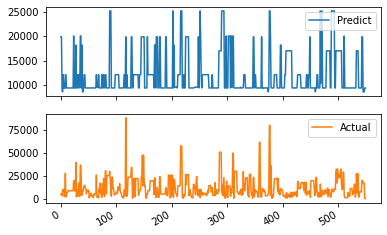

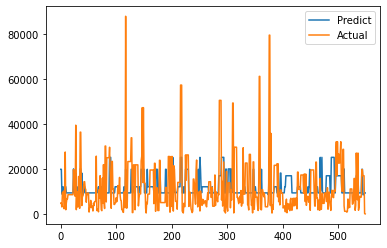

In [13]:
randomforest2 = RandomForestRegressor().fit(X_train2, y_train2)
print(randomforest2.score(X_train2, y_train2))
print(mean_squared_error(y_test2, randomforest2.predict(X_test2),squared=False))
df_7=pd.DataFrame.from_dict(data={'Subgenre': df['Subgenre'],'Predict': list(randomforest2.predict(df_1[['Subgenre']].to_numpy())), 'Actual' : list(df['Reviews'].to_numpy())})
df_7.to_excel("/content/drive/MyDrive/Colab Notebooks/randomforest_reviews.xlsx")
print(df_7.plot(subplots=True))
print(df_7.plot())
print(df_7)

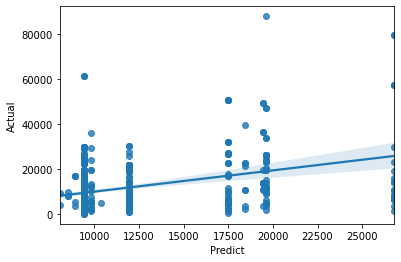

In [12]:
sns.regplot(data=df_7, x='Predict', y='Actual')

А вот для пресказания числа рецензий мы понимаем что наши данные совсем не подходят. Метрики качества показывают очень плохие результаты как и результаты на графике и в таблице.

Можно сделать вывод: используя наши данные можно с довольно высокой точность предсказать цену и примерный рейтинг для каждого поджанра, однако число рецензий с таким количеством данных предсказать не удасться.